$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 5 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix ,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

----------------------------

# `02` Load & Split Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/1133452389.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/train.csv')


Split data via the method you see fit to ensure that you can estimate the generalization error.

In [ ]:
train = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/train.csv')
test = pd.read_csv('/Users/aalaaseif/Documents/ITI/Machine Learning 1/lab/test.csv')

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

## Statistical information

#### from descibe i found out that there is outliers in columns<span style="font-size:20px; color:#48D1CC"> (Num_Bank_Accounts , Delay_from_due_date) </span> because the min is negative value.
#### and also <span style="font-size:20px; color:#48D1CC">(Num_Bank_Accounts	, Num_Credit_Card ,Interest_Rate, Total_EMI_per_month)</span> because they have extreme values which is unrelaistic

In [9]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


#### and columns <span style="font-size:20px; color:#48D1CC">(Monthly_Inhand_Salary , Num_Bank_Accounts , Num_Credit_Card ,Interest_Rate ,Total_EMI_per_month)</span> are right skewed because mean is bigger than med(50%)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

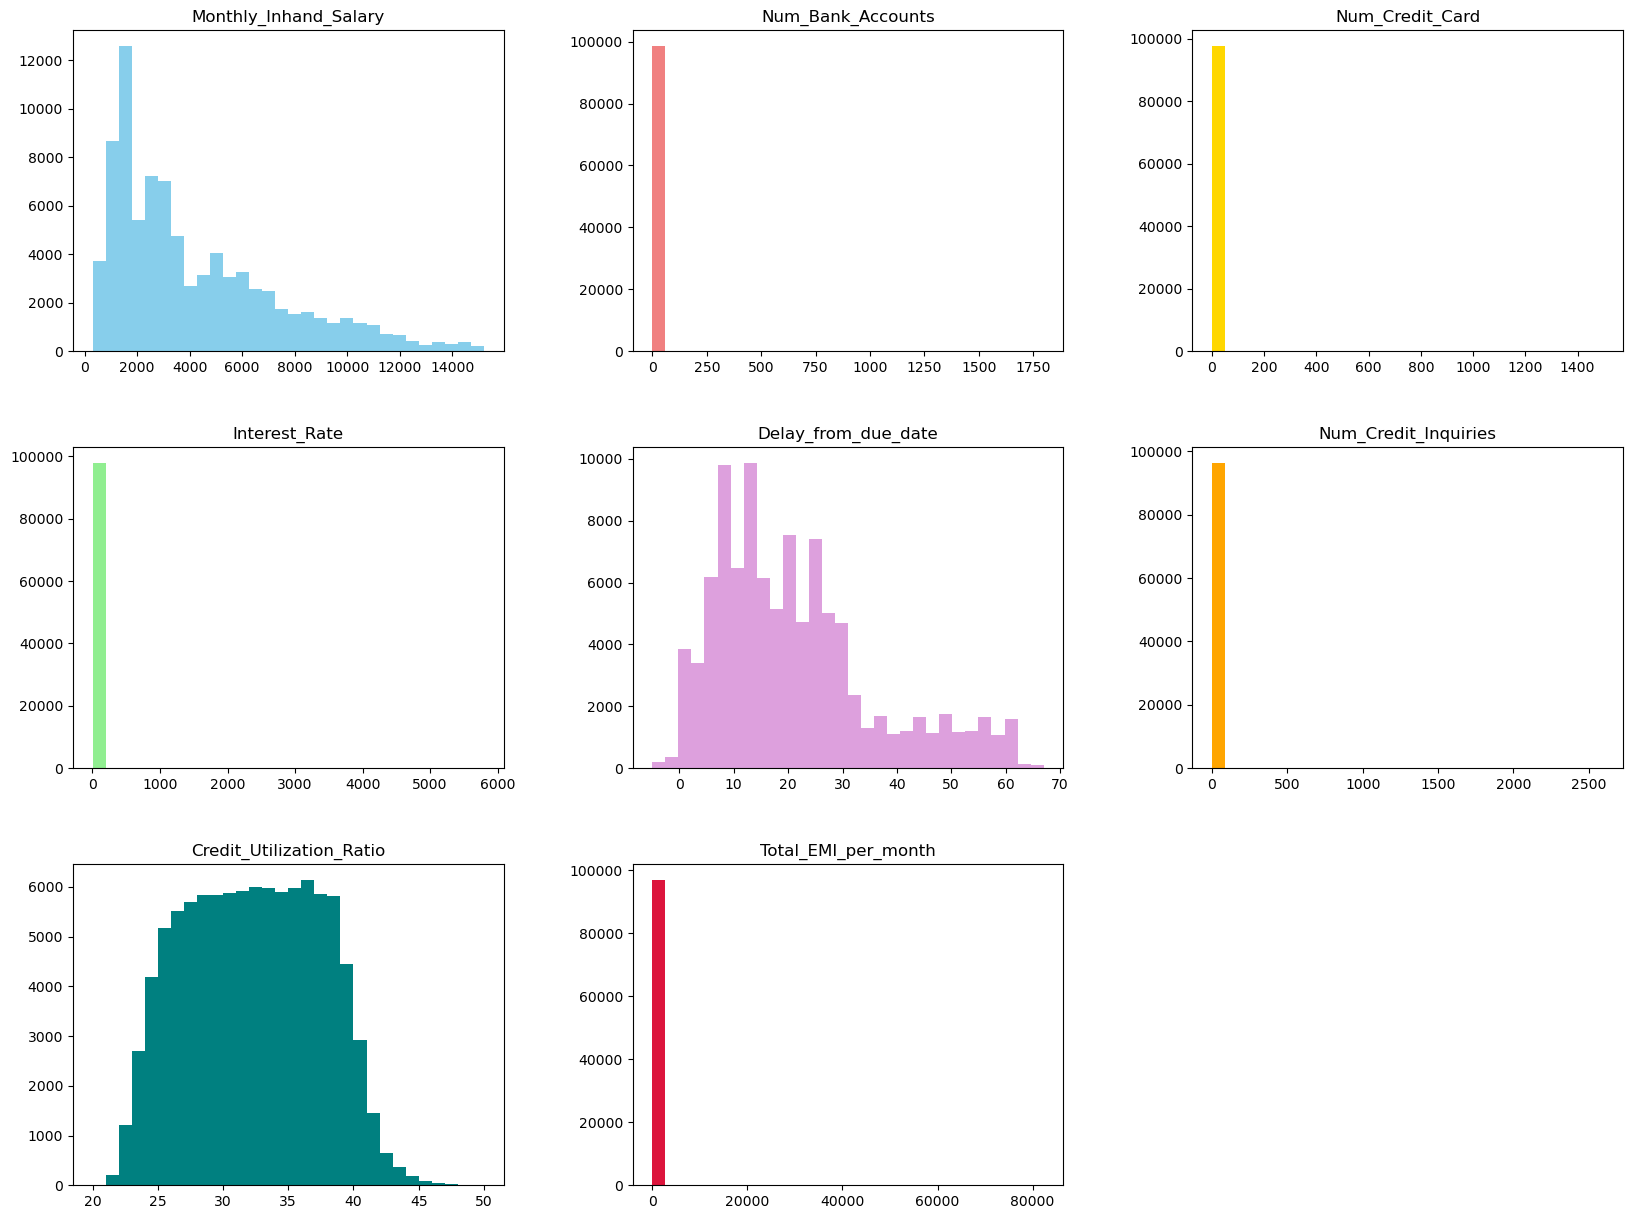

In [10]:
colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen', 'plum', 'orange', 'teal', 'crimson']
axes = train.hist(bins=30, figsize=(20, 15), grid=False)
for ax, color in zip(axes.flatten(), colors * (len(axes.flatten()) // len(colors) + 1)):
    for patch in ax.patches:
        patch.set_facecolor(color)
plt.show()

### Categorical data

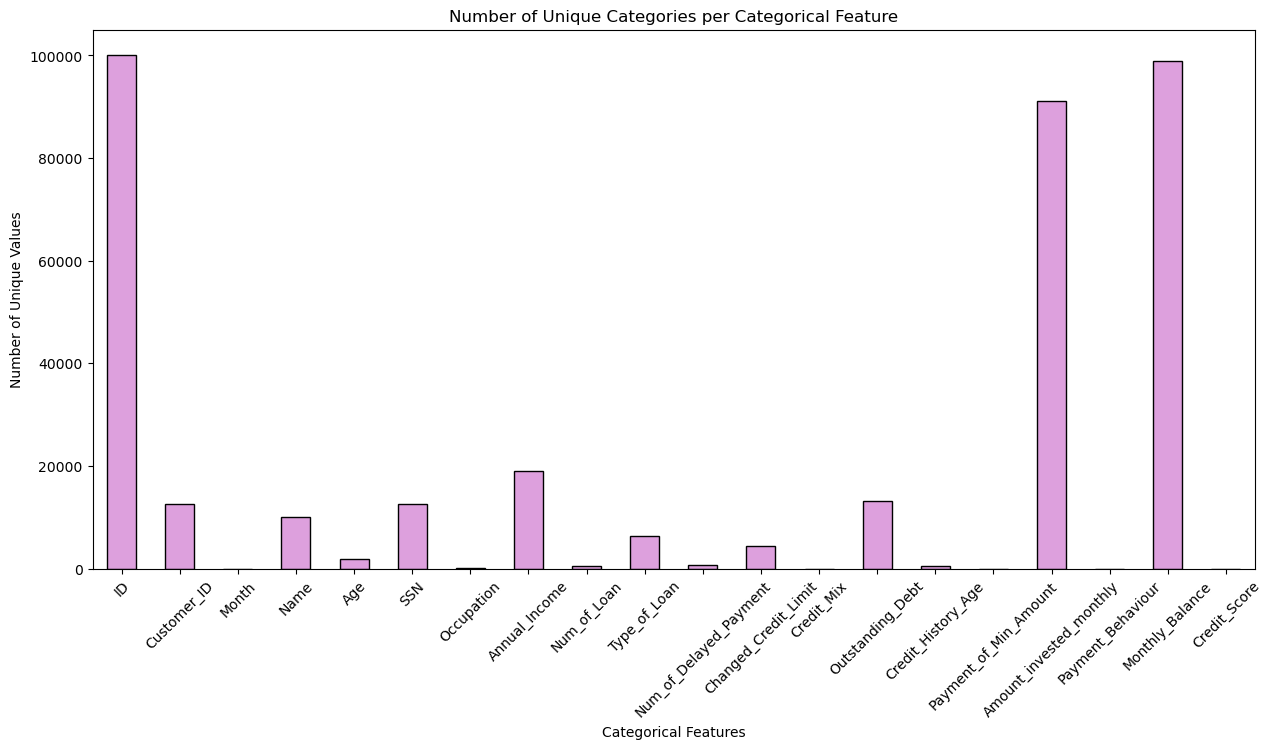

In [11]:
categorical_cols = train.select_dtypes(include=['object']).columns
train[categorical_cols].nunique().plot(kind='bar', figsize=(15, 7), color='plum', edgecolor='black')

plt.title("Number of Unique Categories per Categorical Feature")
plt.xlabel("Categorical Features")
plt.ylabel("Number of Unique Values")
plt.xticks(rotation=45)
plt.show()

### Heat Map

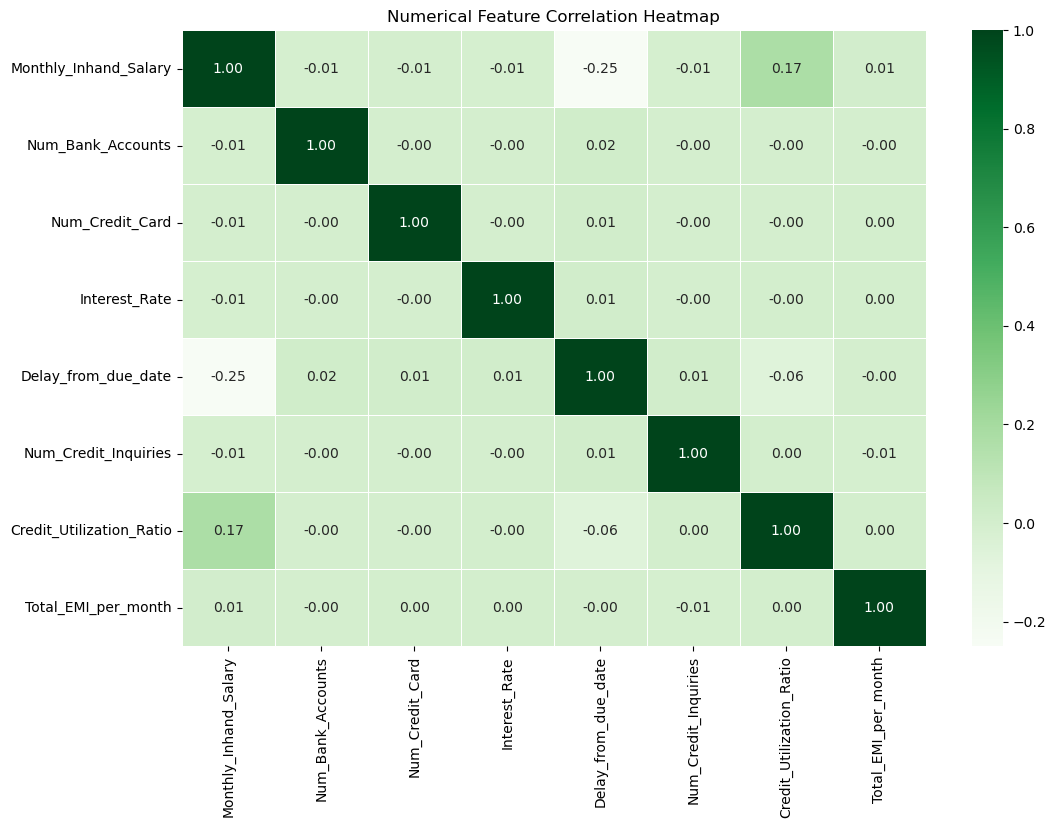

In [12]:
numerical_cols = train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Numerical Feature Correlation Heatmap")
plt.show()

### box plot

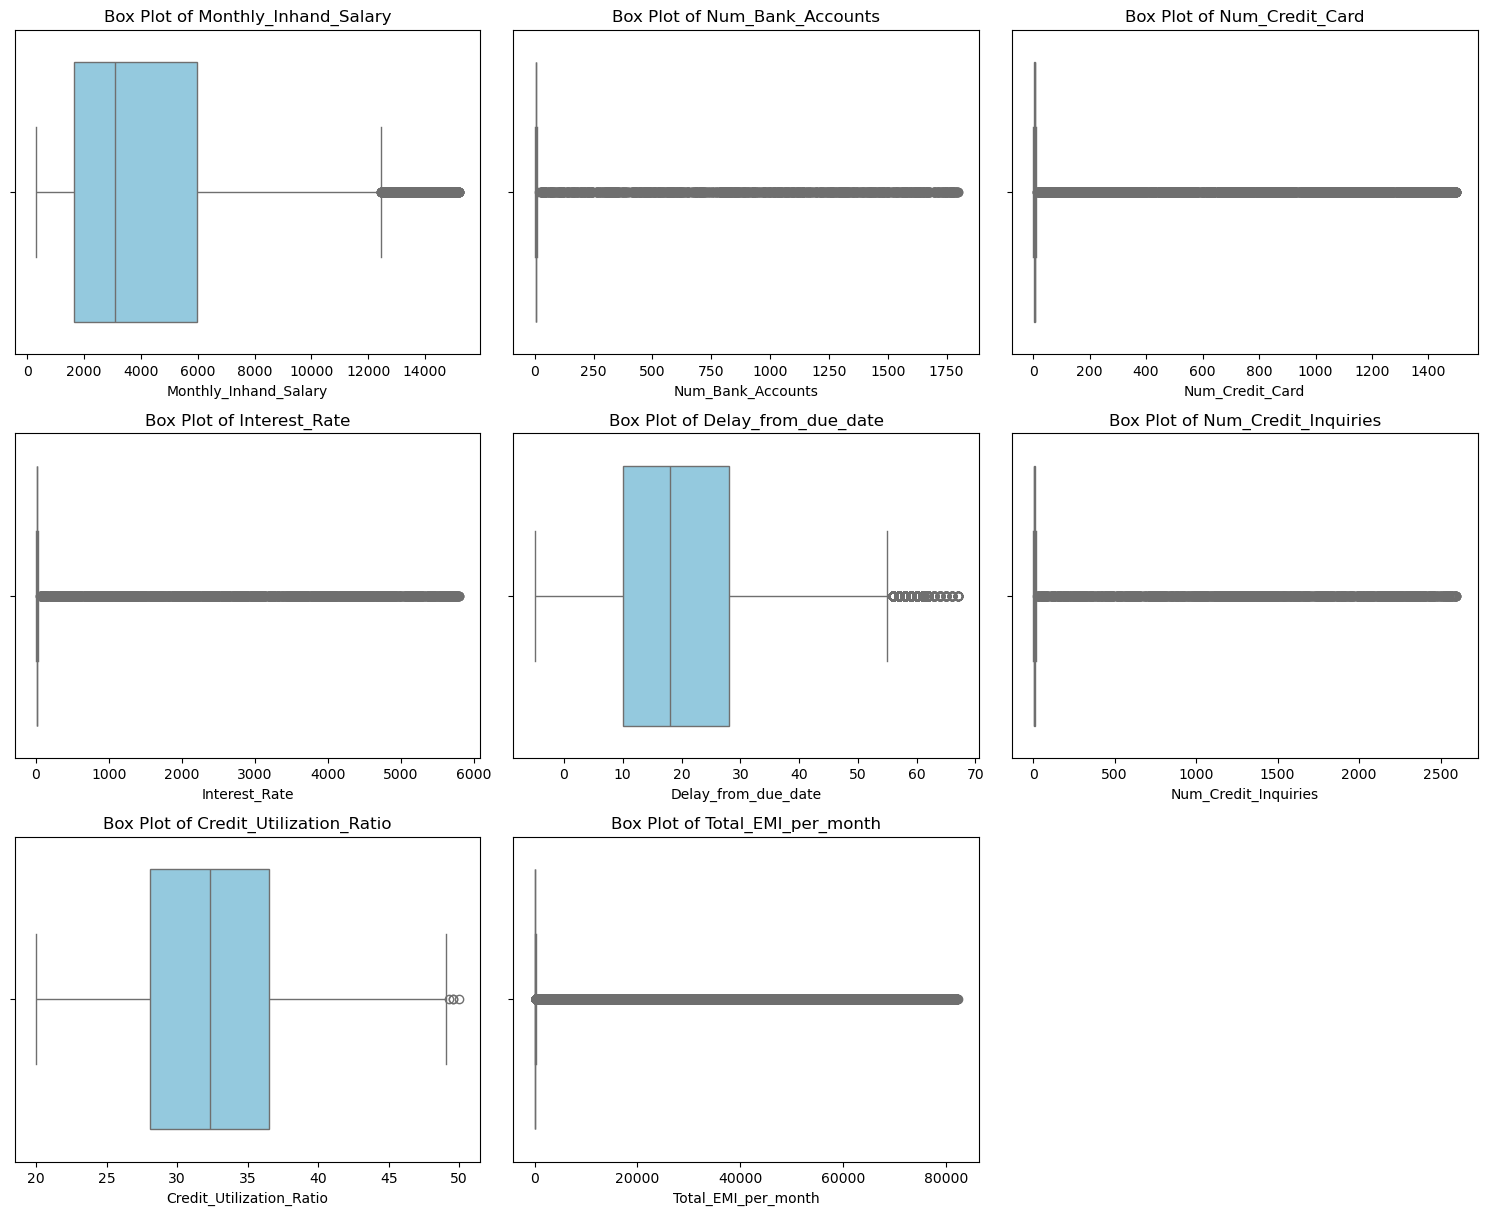

In [13]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)
    sns.boxplot(data=train, x=col, color='skyblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### Scatter plot

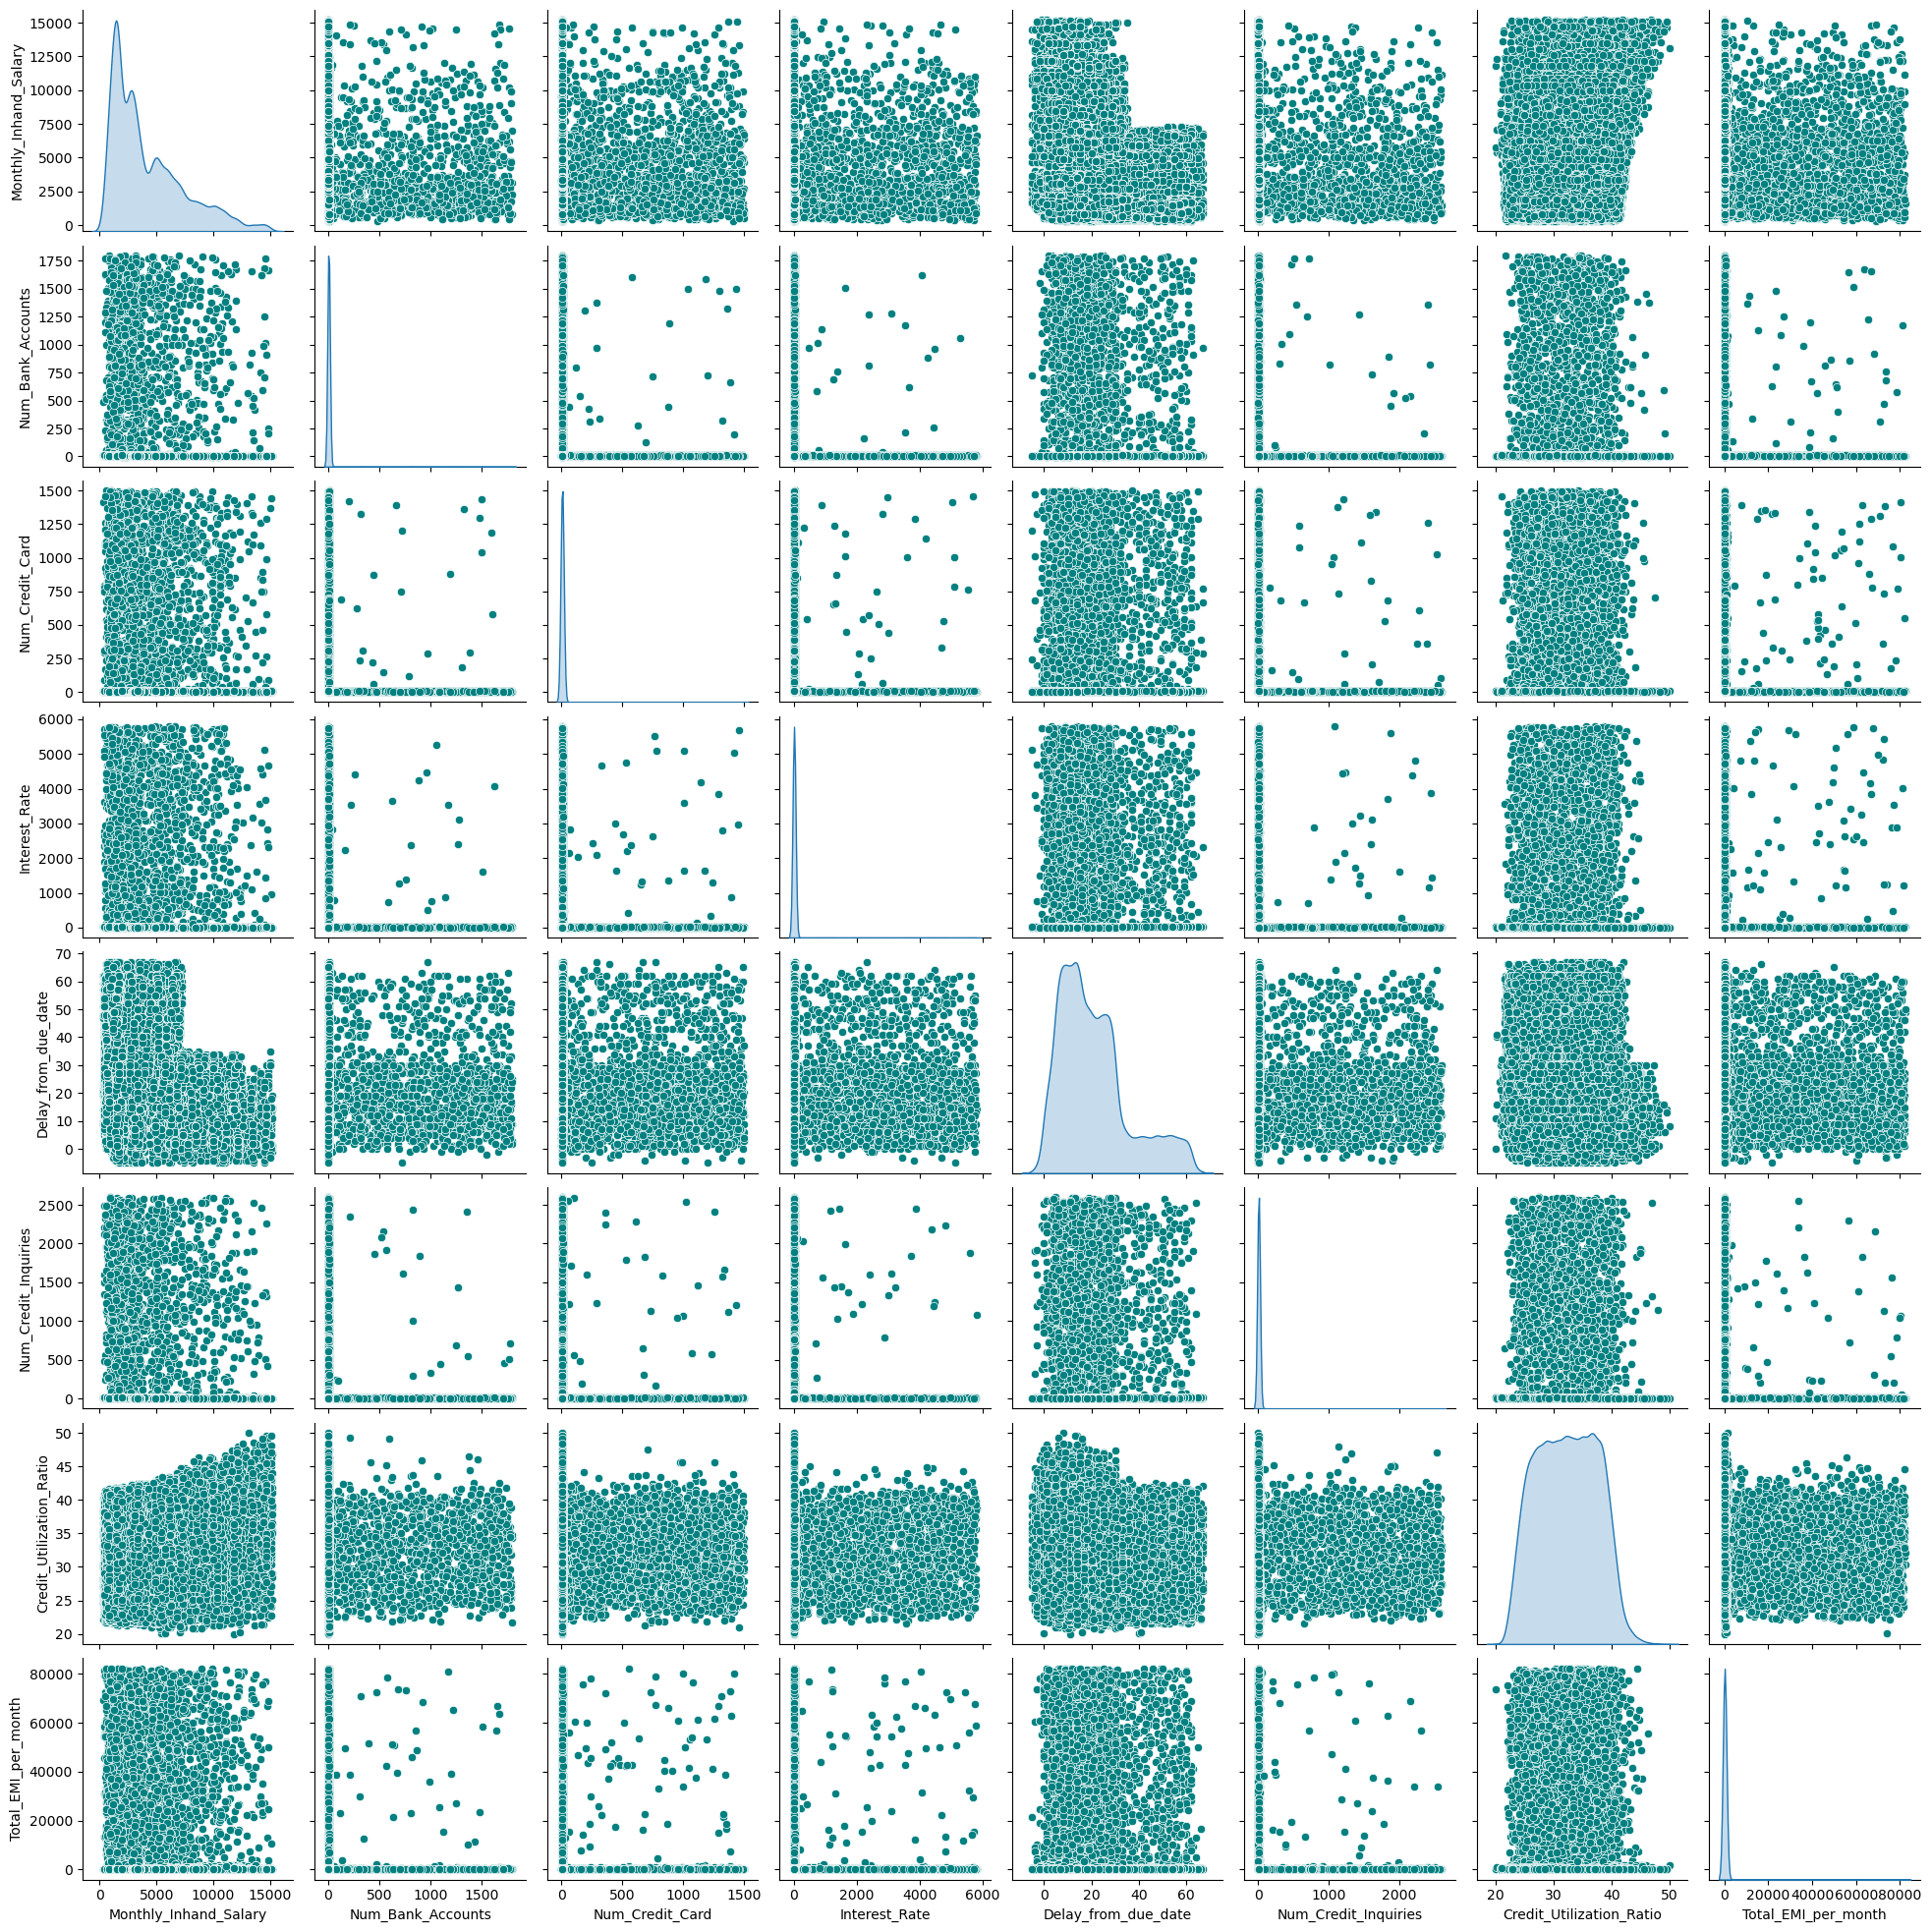

In [14]:
numerical_data = train.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numerical_data, diag_kind='kde', plot_kws={'color': 'teal'})

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

In [15]:
train['Name'].fillna(method='bfill', inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/388131872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Name'].fillna(method='bfill', inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/388131872.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['Name'].fillna(method='bfill', inplace=True)


detecting outliers

In [16]:
def detect_outliers(df):
    outlier_cols = []

    for col in df.select_dtypes(include=['int64', 'float64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if ((df[col] < lower_bound) | (df[col] > upper_bound)).sum() > 0:
            outlier_cols.append(col)

    return outlier_cols

outlier_columns = detect_outliers(train)
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']


fill the columns that contains missing value with median

In [18]:
for col in ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
            'Credit_Utilization_Ratio', 'Total_EMI_per_month']:
    train[col].fillna(train[col].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/823883153.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [19]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Other missing

In [20]:
for col in ['Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_History_Age',
            'Amount_invested_monthly', 'Monthly_Balance']:
    print(f"{col}: {train[col].dtype}")

Type_of_Loan: object
Num_of_Delayed_Payment: object
Credit_History_Age: object
Amount_invested_monthly: object
Monthly_Balance: object


In [21]:
categorical_cols_to_fill = ['Type_of_Loan', 'Credit_History_Age']
for col in categorical_cols_to_fill:
    train[col].fillna(train[col].mode()[0], inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/2019288121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)


In [22]:
df_filtered = train[train["Num_of_Delayed_Payment"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Num_of_Delayed_Payment"].unique())

train.loc[~train['Num_of_Delayed_Payment'].str.match(r'^\d+$', na=False), 'Num_of_Delayed_Payment'] = np.nan

train.loc[train['Num_of_Delayed_Payment'].astype(float).between(0, 50) == False, 'Num_of_Delayed_Payment'] = np.nan

[nan '8_' '-1' '3_' '2_' '13_' '14_' '12_' '22_' '4_' '11_' '21_' '10_'
 '183_' '9_' '19_' '24_' '17_' '23_' '20_' '-3' '6_' '1_' '16_' '-2' '15_'
 '26_' '18_' '5_' '25_' '7_' '0_' '2569_' '27_' '663_' '-2_' '28_' '-1_'
 '1323_' '2794_' '2219_' '758_' '-3_' '848_' '2237_' '3097_' '2566_'
 '3840_' '2278_' '1087_' '1295_' '3861_' '2142_' '1473_' '3920_']


In [23]:
int_cols = ['Num_of_Delayed_Payment']
train[int_cols] = train[int_cols].astype(float).fillna(0).astype(int)

In [24]:
df_filtered = train[train["Monthly_Balance"].astype(str).str.contains(r"[^-?\d+(\.\d+)?$]", regex=True)]
print(df_filtered["Monthly_Balance"].unique())
train.loc[train["Monthly_Balance"].astype(str).str.contains(r"[^-?\d+(\.\d+)?$]", regex=True, na=False), "Monthly_Balance"] = None

train.loc[~train['Amount_invested_monthly'].astype(str).str.match(r'^\d+(\.\d+)?$'), 'Amount_invested_monthly'] = np.nan

[nan '__-333333333333333333333333333__']


In [25]:
int_cols_to_fill = ['Num_of_Delayed_Payment']
for col in int_cols_to_fill:
    train[col] = train[col].astype(float).astype('Int64')
    train[col].fillna(train[col].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/2006881939.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)


In [26]:
float_cols_to_fill = ['Amount_invested_monthly', 'Monthly_Balance']
for col in float_cols_to_fill:
    train[col] = train[col].astype(float)
    train[col].fillna(train[col].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/231834356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/231834356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [27]:
train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

handling other corbuted

In [29]:
df_filtered = train[train["Age"].astype(str).str.contains(r"[^0-9]", regex=True)]
print(df_filtered["Age"].unique())

train.loc[:, "Age"] = train["Age"].astype(str).str.extract(r'(\d+)')[0]

['-500' '28_' '34_' '30_' '24_' '33_' '35_' '31_' '40_' '37_' '54_' '21_'
 '20_' '43_' '38_' '18_' '2111_' '46_' '16_' '19_' '47_' '53_' '25_' '27_'
 '55_' '42_' '48_' '49_' '50_' '32_' '22_' '17_' '29_' '15_' '51_' '26_'
 '39_' '14_' '36_' '44_' '7670_' '45_' '23_' '41_' '52_' '733_' '5769_'
 '4383_' '56_' '2650_' '3307_' '6962_' '5589_' '6556_' '1447_' '8153_'
 '3834_' '6744_' '6471_' '7723_' '7640_' '6408_' '3502_' '7316_' '1102_'
 '8669_' '2463_' '6666_' '3055_' '1248_' '2220_' '2159_' '4583_' '3988_'
 '2155_' '6770_' '1843_' '1367_' '3742_' '2171_' '5109_' '3984_' '2474_'
 '5046_' '7715_' '2329_' '707_' '844_' '2756_' '2037_' '902_' '8523_'
 '3640_' '3998_' '3712_' '2097_' '8348_' '5373_' '3291_' '2994_' '3339_'
 '2812_' '3578_' '3564_' '1794_' '737_' '4301_' '2846_' '2373_' '1188_'
 '8207_' '5909_' '6381_' '8616_' '6799_' '1591_' '3775_' '6564_' '7122_'
 '4913_' '5697_' '3843_' '4445_' '6921_' '780_' '1070_' '5798_' '4808_']


In [30]:
train.loc[train["Annual_Income"].astype(str).str.contains(r"[^0-9.]", regex=True), "Annual_Income"] = np.nan

In [31]:
train["Annual_Income"] = train["Annual_Income"].astype(float)
train["Annual_Income"].fillna(train["Annual_Income"].mean(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/936356973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Annual_Income"].fillna(train["Annual_Income"].mean(), inplace=True)


In [32]:
train["Occupation"] = train["Occupation"].replace("_______", np.nan)
train["Occupation"].fillna(method="bfill", inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/863753705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Occupation"].fillna(method="bfill", inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/863753705.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train["Occupation"].fillna(method="bfill", inplace=True)


In [33]:
train["Changed_Credit_Limit"] = (
    train["Changed_Credit_Limit"]
    .astype(str)
    .str.replace("_", "")
    .replace("", np.nan)
    .astype(float)
)

train["Changed_Credit_Limit"].fillna(train["Changed_Credit_Limit"].mean(), inplace=True)


/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/4150836840.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Changed_Credit_Limit"].fillna(train["Changed_Credit_Limit"].mean(), inplace=True)


In [34]:
train["Credit_Mix"] = train["Credit_Mix"].str.replace("_", "").replace("", np.nan)
train["Credit_Mix"].fillna(method="bfill", inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/515581001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Credit_Mix"].fillna(method="bfill", inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/515581001.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train["Credit_Mix"].fillna(method="bfill", inplace=True)


In [35]:
train["Payment_Behaviour"] = train["Payment_Behaviour"].astype(str).str.replace(r"[^a-zA-Z\s]", "", regex=True)
train["Payment_Behaviour"].replace("", np.nan, inplace=True)
train["Payment_Behaviour"].fillna(method="bfill", inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/4091735950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Payment_Behaviour"].replace("", np.nan, inplace=True)
/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/4091735950.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [36]:
train = train.drop(columns=['ID','Customer_ID','Name','SSN','Age'])

In [37]:
train["Payment_Behaviour"].fillna(train["Payment_Behaviour"].mode()[0], inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/3413846765.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Payment_Behaviour"].fillna(train["Payment_Behaviour"].mode()[0], inplace=True)


In [38]:
train.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [39]:
X = train.drop(columns=["Credit_Score"])
y = train["Credit_Score"]

In [40]:
log_cols = ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Interest_Rate', 'Num_Credit_Inquiries',
            'Credit_Utilization_Ratio', 'Total_EMI_per_month']

train[log_cols] = train[log_cols].apply(np.log1p)

In [41]:
train['Delay_from_due_date'] = train['Delay_from_due_date'].apply(lambda x: max(x, 0))
train['Delay_from_due_date'] = np.log1p(train['Delay_from_due_date'])

In [42]:
q1 = train["Annual_Income"].quantile(0.25)
q3 = train["Annual_Income"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train[(train["Annual_Income"] < lower_bound) | (train["Annual_Income"] > upper_bound)]
print(outliers)

          Month     Occupation  Annual_Income  Monthly_Inhand_Salary  \
54         July         Lawyer     10909427.0               8.037461   
245        June      Scientist       586359.0               7.429621   
361    February   Entrepreneur     18334118.0               8.382629   
368     January      Architect     19717385.0               6.964547   
379       April        Teacher      2709655.0               8.921454   
...         ...            ...            ...                    ...   
99664   January         Lawyer      5794377.0               8.037461   
99714     March         Doctor     11712577.0               8.037461   
99721  February      Architect      8544730.0               8.070644   
99882     March       Mechanic     16884797.0               8.601892   
99945  February  Media_Manager     10152115.0               8.499001   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
54              0.000000         0.693147       2.197225       

In [43]:
train["Annual_Income"] = np.where(train["Annual_Income"] > upper_bound, upper_bound, train["Annual_Income"])
train["Annual_Income"] = np.where(train["Annual_Income"] < lower_bound, lower_bound, train["Annual_Income"])
train.loc[train["Annual_Income"] > upper_bound, "Annual_Income"] = train["Annual_Income"].median()

In [44]:
train["Annual_Income"] = np.log1p(train["Annual_Income"])

In [45]:
train["Num_of_Loan"] = train["Num_of_Loan"].astype(str).str.replace("_", "").astype(float)
train.loc[train["Num_of_Loan"] < 0, "Num_of_Loan"] = np.nan
train["Num_of_Loan"].fillna(train["Num_of_Loan"].median(), inplace=True)

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_2314/1006095938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Num_of_Loan"].fillna(train["Num_of_Loan"].median(), inplace=True)


In [46]:
Q1 = train["Num_of_Loan"].quantile(0.25)
Q3 = train["Num_of_Loan"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train["Num_of_Loan"] = np.clip(train["Num_of_Loan"], lower_bound, upper_bound)

In [47]:
train["Num_Bank_Accounts"] = train["Num_Bank_Accounts"].astype(str).str.replace("_", "", regex=False).astype(float)

In [48]:
categorical_cols = train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Occupation                100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  Int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  in

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [51]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    X_test[col] = X_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

array(['Standard', 'Standard', 'Poor', ..., 'Standard', 'Poor',
       'Standard'], dtype=object)

[Text(0.5, 0.9166666666666666, 'x[6] <= 20.5\ngini = 0.601\nsamples = 80000\nvalue = [14196, 23239, 42565]'),
 Text(0.25, 0.75, 'x[13] <= 1.5\ngini = 0.566\nsamples = 60372\nvalue = [13697, 11019, 35656]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[9] <= 15.5\ngini = 0.654\nsamples = 29487\nvalue = [11590, 7149, 10748]'),
 Text(0.0625, 0.4166666666666667, 'x[5] <= 2.5\ngini = 0.585\nsamples = 20000\nvalue = [10241, 2262, 7497]'),
 Text(0.03125, 0.25, 'x[3] <= 10029.582\ngini = 0.344\nsamples = 3162\nvalue = [2465, 1, 696]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.321\nsamples = 2700\nvalue = [2158, 0, 542]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.447\nsamples = 462\nvalue = [307, 1, 154]'),
 Text(0.09375, 0.25, 'x[5] <= 5.5\ngini = 0.606\nsamples = 16838\nvalue = [7776, 2261, 6801]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.582\nsamples = 11405\nvalue = [5884.0, 1269.0, 4252.0]'),
 Text(0.109375, 0.08333333333333333, 'gini =

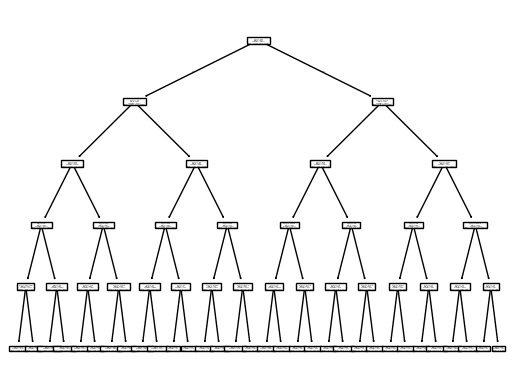

In [65]:
tree.plot_tree(clf)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [56]:
accuracy = accuracy_score(y_test, y_test)  
conf_matrix = confusion_matrix(y_test, y_test)  
class_report = classification_report(y_test, y_test)  

print("Accuracy:", accuracy)  
print("Confusion Matrix:\n", conf_matrix)  
print("Classification Report:\n", class_report)  

Accuracy: 1.0
Confusion Matrix:
 [[ 3632     0     0]
 [    0  5759     0]
 [    0     0 10609]]
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      3632
        Poor       1.00      1.00      1.00      5759
    Standard       1.00      1.00      1.00     10609

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [57]:
clf = tree.DecisionTreeClassifier(max_depth=5)  
clf = clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)  

In [58]:
accuracy = accuracy_score(y_test, y_test)  
conf_matrix = confusion_matrix(y_test, y_test)  
class_report = classification_report(y_test, y_test)  

print("Accuracy:", accuracy)  
print("Confusion Matrix:\n", conf_matrix)  
print("Classification Report:\n", class_report)  

Accuracy: 1.0
Confusion Matrix:
 [[ 3632     0     0]
 [    0  5759     0]
 [    0     0 10609]]
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      3632
        Poor       1.00      1.00      1.00      5759
    Standard       1.00      1.00      1.00     10609

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [68]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)  
clf = clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)  

In [69]:
accuracy = accuracy_score(y_test, y_test)  
conf_matrix = confusion_matrix(y_test, y_test)  
class_report = classification_report(y_test, y_test)  

print("Accuracy:", accuracy)  
print("Confusion Matrix:\n", conf_matrix)  
print("Classification Report:\n", class_report)  

Accuracy: 1.0
Confusion Matrix:
 [[ 3632     0     0]
 [    0  5759     0]
 [    0     0 10609]]
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      3632
        Poor       1.00      1.00      1.00      5759
    Standard       1.00      1.00      1.00     10609

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

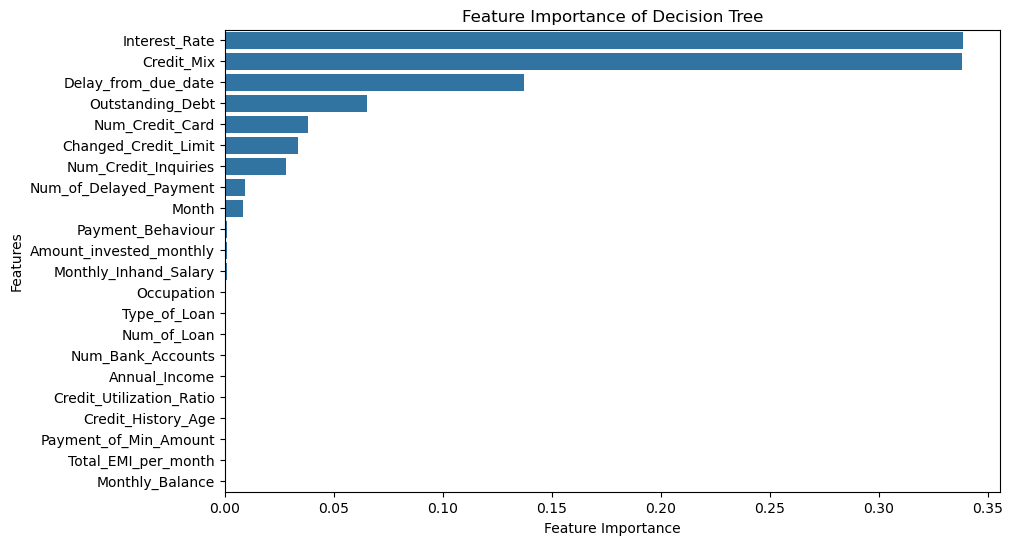

In [63]:
feature_importance = clf.feature_importances_  
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})  
features_df = features_df.sort_values(by='Importance', ascending=False)  

plt.figure(figsize=(10, 6))  
sns.barplot(x=features_df['Importance'], y=features_df['Feature'])  
plt.xlabel("Feature Importance")  
plt.ylabel("Features")  
plt.title("Feature Importance of Decision Tree")  
plt.show()

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [64]:
train_preds = clf.predict(X_train)  
test_preds = clf.predict(X_test)  

train_accuracy = accuracy_score(y_train, train_preds)  
test_accuracy = accuracy_score(y_test, test_preds)  

generalization_error = train_accuracy - test_accuracy  

print(f"Training Accuracy: {train_accuracy:.4f}")  
print(f"Test Accuracy: {test_accuracy:.4f}")  
print(f"Generalization Error: {generalization_error:.4f}")  

Training Accuracy: 0.6940
Test Accuracy: 0.6923
Generalization Error: 0.0017


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$